In [ ]:
# Cell 1: Install required libraries
!pip install opencv-python scikit-image


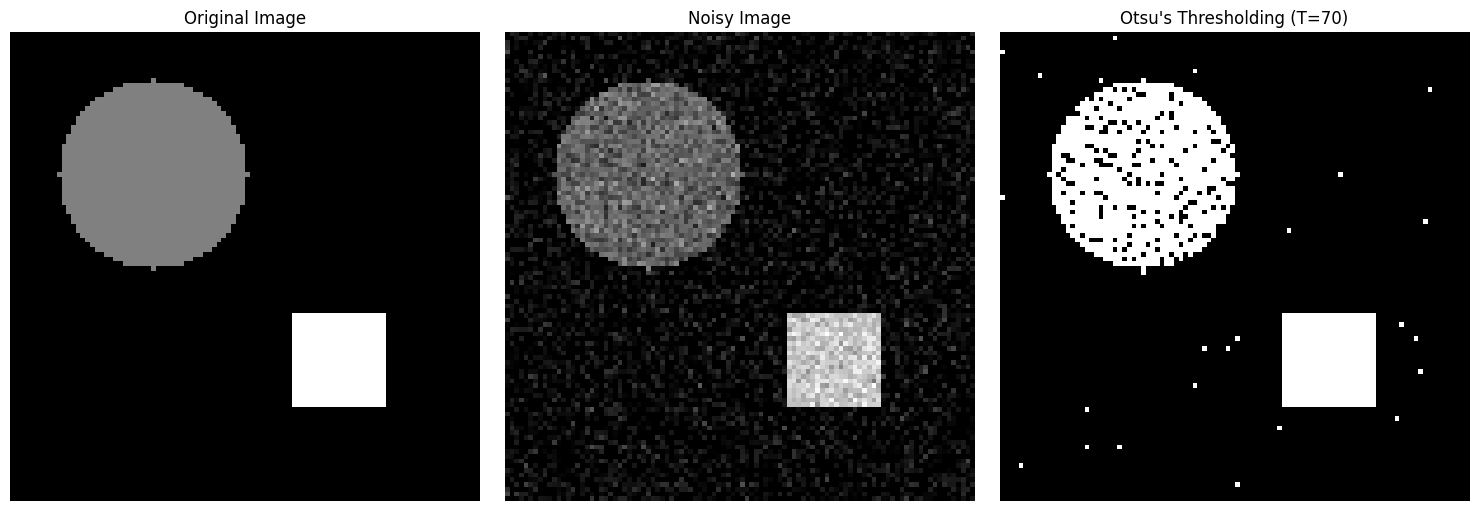

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_synthetic_image(width=100, height=100):
    image = np.zeros((height, width), dtype=np.uint8)
    # Background: pixel value 0
    # Object 1: circle with value 100
    # Object 2: rectangle with value 200
    cv2.circle(image, (30, 30), 20, 100, -1)
    cv2.rectangle(image, (60, 60, 20, 20), 200, -1)
    return image

def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def otsu_threshold(image):
    # Compute histogram
    hist, bins = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size

    # Initialize variables
    sum_total = np.sum(np.arange(256) * hist)
    sum_b = 0
    weight_b = 0
    max_variance = 0
    threshold = 0

    # Find optimal threshold
    for t in range(256):
        weight_f = total_pixels - weight_b
        if weight_b > 0 and weight_f > 0:
            sum_f = sum_total - sum_b
            mean_b = sum_b / weight_b
            mean_f = sum_f / weight_f
            variance = weight_b * weight_f * (mean_b - mean_f) ** 2
            if variance > max_variance:
                max_variance = variance
                threshold = t
        weight_b += hist[t]
        sum_b += t * hist[t]

    # Apply threshold
    binary_image = (image > threshold).astype(np.uint8) * 255
    return binary_image, threshold

# Create images
original_image = create_synthetic_image()
noisy_image = add_gaussian_noise(original_image)
binary_image, threshold = otsu_threshold(noisy_image)

# Create 3-in-1 plot
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy Image
plt.subplot(132)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(133)
plt.imshow(binary_image, cmap='gray')
plt.title(f"Otsu's Thresholding (T={threshold})")
plt.axis('off')

plt.tight_layout()
plt.show()

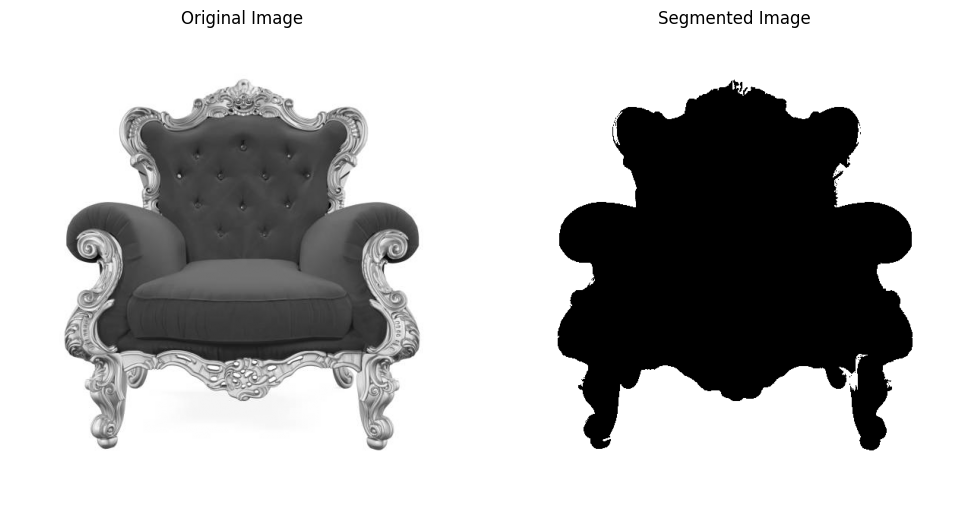

In [ ]:
888888888888888888888888888888888888888888import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(image, seeds, threshold=10, connectivity=4):

    height, width = image.shape
    segmented = np.zeros((height, width), dtype=np.uint8)
    visited = np.zeros((height, width), dtype=bool)

    if connectivity == 4:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    else:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0),
                     (1, 1), (1, -1), (-1, 1), (-1, -1)]

    queue = []
    seed_values = [image[y, x] for (x, y) in seeds]
    mean_seed_value = np.mean(seed_values) if seed_values else 0

    for seed in seeds:
        x, y = seed
        if 0 <= x < width and 0 <= y < height:
            queue.append((x, y))
            segmented[y, x] = 1
            visited[y, x] = True

    while queue:
        curr_x, curr_y = queue.pop(0)
        curr_value = image[curr_y, curr_x]

        for dx, dy in neighbors:
            new_x, new_y = curr_x + dx, curr_y + dy
            if 0 <= new_x < width and 0 <= new_y < height:
                if not visited[new_y, new_x]:
                    if abs(int(image[new_y, new_x]) - int(mean_seed_value)) <= threshold:
                        queue.append((new_x, new_y))
                        segmented[new_y, new_x] = 1
                        visited[new_y, new_x] = True

    return segmented

def plot_images(original, segmented):

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image')
    plt.imshow(segmented, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Load image (grayscale)
    image = cv2.imread('/content/chairImage.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Could not load image. Please check the path or upload it.")

    # Define seed points (x, y) format
    seeds = [(50, 50), (60, 60)]  # You can adjust these based on the image content

    # Perform region growing
    segmented = region_growing(image, seeds, threshold=50, connectivity=4)

    # Plot images
    plot_images(image, segmented * 255)  # Multiply by 255 for visualization

    # Save result
    cv2.imwrite('/content/segmented_image.jpg', segmented * 255)

# Call the main function
main()

